## Scrape the Content

In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
result=requests.get("https://www.goodreads.com/quotes/tag/naruto")

In [3]:
src=result.content
soup=BeautifulSoup(src,'lxml')

In [4]:
import pandas as pd

Quotes = []
Author = []

for row in soup.findAll('div',attrs={'class':'quoteText'}):
    #print(row.text.strip().split("\"",1)[0].split("\n",1)[0])
    #print(row.text.strip().split("\"",1)[0].split("\n",1)[1].split("―",1)[1].split(",",1)[0]) #Working    
    
    Quotes.append(row.text.strip().split("\"",1)[0].split("\n",1)[0])
    #quote['url'] = row.a['href'] 
    #quote['img'] = row.img['src'] 
    #quote['likes'] = row.h6.text 
    
for row in soup.findAll('span',attrs={'class':'authorOrTitle'}):
    Author.append(row.text.strip().split(",",1)[0])
        
    #.split("-",1)[0]
    #print(type(row.text))

pd.set_option('display.max_colwidth', -1)
df = pd.DataFrame({"Quotes":Quotes,"Author":Author})
df

,Quotes,Author
0,“She's strong! And scary...I bet she's single...I'd put money on it..”,Masashi Kishimoto
1,"“If you don't like the hand that fate's dealt you, fight for a new one.”",Masashi Kishimoto
2,"“When people are protecting something truly special to them, they truly can become...as strong as they can be.”",Masashi Kishimoto
3,“A smile is the best way to get away with trouble even if it’s a fake one.”,Masashi Kishimoto
4,"“When a man learns to love, he must bear the risk of hatred.”",Uchiha Madara
5,"“The pain of being alone is completely out of this world, isn't it? I don't know why, but I understand your feelings so much, it actually hurts. ”",Masashi Kishimoto
6,“There's no advantage to hurrying through life.,Masashi Kishimoto
7,"“Sure, in a ninja's world, those who violate the rules and fail to follow orders...are lower than garbage. However...those who do not care for and support their fellows...are even lower than that!",Masashi Kishimoto
8,“Give up trying to make me give up”,Masashi Kishimoto
9,“Gaara: Can Sasuke come out to Die? Kakashi: Not Now.Gaara:.............Gaara: How 'bout now?”,Masashi Kishimoto


In [61]:
len(Author)

30

In [5]:
Likes=[]
for row in soup.findAll('a',attrs={'class':'smallText'}):
    Likes.append(row.text.split(" ",1)[0])

In [6]:
Likes

['2205',
 '1820',
 '732',
 '605',
 '529',
 '450',
 '449',
 '393',
 '363',
 '309',
 '308',
 '283',
 '281',
 '244',
 '237',
 '235',
 '226',
 '184',
 '182',
 '154',
 '143',
 '139',
 '136',
 '135',
 '135',
 '132',
 '121',
 '119',
 '117',
 '108']

In [7]:
df['Likes']=Likes

In [8]:
df.head()

,Quotes,Author,Likes
0,“She's strong! And scary...I bet she's single...I'd put money on it..”,Masashi Kishimoto,2205
1,"“If you don't like the hand that fate's dealt you, fight for a new one.”",Masashi Kishimoto,1820
2,"“When people are protecting something truly special to them, they truly can become...as strong as they can be.”",Masashi Kishimoto,732
3,“A smile is the best way to get away with trouble even if it’s a fake one.”,Masashi Kishimoto,605
4,"“When a man learns to love, he must bear the risk of hatred.”",Uchiha Madara,529


In [76]:
type(df['Likes'])

pandas.core.series.Series

In [78]:
df.dtypes

Quotes    object
Author    object
Likes     object
dtype: object

In [9]:
df['Likes'] = df.Likes.astype('int64')
df.dtypes

Quotes    object
Author    object
Likes     int64 
dtype: object

In [10]:
df.Likes.mean()

382.46666666666664

In [82]:
df.describe()

,Likes
count,30.000000
mean,382.433333
std,472.831871
min,108.000000
25%,136.750000
50%,236.000000
75%,385.500000
max,2205.000000


In [11]:
q2=236

In [12]:
x = []
for i in df.Likes:
    if i > q2:
        x.append(1)
    else:
        x.append(0)
df['Target'] = x

In [85]:
df.head()

,Quotes,Author,Likes,Target
0,“She's strong! And scary...I bet she's single...I'd put money on it..”,Masashi Kishimoto,2205,1
1,"“If you don't like the hand that fate's dealt you, fight for a new one.”",Masashi Kishimoto,1819,1
2,"“When people are protecting something truly special to them, they truly can become...as strong as they can be.”",Masashi Kishimoto,732,1
3,“A smile is the best way to get away with trouble even if it’s a fake one.”,Masashi Kishimoto,605,1
4,"“When a man learns to love, he must bear the risk of hatred.”",Uchiha Madara,529,1


In [13]:
df.Author[df.Author=='Kishimoto Masashi']='Masashi Kishimoto'

C:\Users\sneha chikhalekar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
df.Author.value_counts()

Masashi Kishimoto    27
Uchiha Madara        1 
Gaara                1 
Uchiha Obito         1 
Name: Author, dtype: int64

## Bag of Words

In [15]:
quotes = list(df['Quotes'].str.lower())

In [16]:
quotes[:3]

["“she's strong! and scary...i bet she's single...i'd put money on it..”",
 "“if you don't like the hand that fate's dealt you, fight for a new one.”",
 '“when people are protecting something truly special to them, they truly can become...as strong as they can be.”']

In [17]:
#from nltk.tokenize import word_tokenize
import re
new_quotes=[]
q=[]
for i in quotes:
    '''
    for j in i:
        x = re.sub(r'“”','',j)
        q.append(x)
    new_quotes.append(q)
    '''
    i = re.sub(r'[\“\”]','',i)
    #q.append(i)
        
    new_quotes.append([i])
    #new_quotes.append(q)


In [18]:
new_quotes

[["she's strong! and scary...i bet she's single...i'd put money on it.."],
 ["if you don't like the hand that fate's dealt you, fight for a new one."],
 ['when people are protecting something truly special to them, they truly can become...as strong as they can be.'],
 ['a smile is the best way to get away with trouble even if it’s a fake one.'],
 ['when a man learns to love, he must bear the risk of hatred.'],
 ["the pain of being alone is completely out of this world, isn't it? i don't know why, but i understand your feelings so much, it actually hurts. "],
 ["there's no advantage to hurrying through life."],
 ["sure, in a ninja's world, those who violate the rules and fail to follow orders...are lower than garbage. however...those who do not care for and support their fellows...are even lower than that!"],
 ['give up trying to make me give up'],
 ["gaara: can sasuke come out to die? kakashi: not now.gaara:.............gaara: how 'bout now?"],
 ["there's only one thing that can heal t

In [19]:
## Tokenize

In [20]:
from nltk.tokenize import word_tokenize
tokenized_quotes = []
for i in new_quotes:
    for j in i:
        try:
            x = re.sub(r'[\.\"\"\..\-,\'\!\;\'\"\--\...\?\:\.............\’\\]','',j)
            tokenized_quotes.append([x])
        except:
        #tokenized_quotes.append(['error'])
            pass

In [21]:
tokens=[]
for i in tokenized_quotes:
    d=[]
    for j in i:
        d.extend(word_tokenize(j))
    tokens.append(d)

In [22]:
tokens[:4]

[['shes',
  'strong',
  'and',
  'scaryi',
  'bet',
  'shes',
  'singleid',
  'put',
  'money',
  'on',
  'it'],
 ['if',
  'you',
  'dont',
  'like',
  'the',
  'hand',
  'that',
  'fates',
  'dealt',
  'you',
  'fight',
  'for',
  'a',
  'new',
  'one'],
 ['when',
  'people',
  'are',
  'protecting',
  'something',
  'truly',
  'special',
  'to',
  'them',
  'they',
  'truly',
  'can',
  'becomeas',
  'strong',
  'as',
  'they',
  'can',
  'be'],
 ['a',
  'smile',
  'is',
  'the',
  'best',
  'way',
  'to',
  'get',
  'away',
  'with',
  'trouble',
  'even',
  'if',
  'its',
  'a',
  'fake',
  'one']]

## Lemmatize

In [23]:
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [24]:
import nltk
from nltk.stem import WordNetLemmatizer
LM = WordNetLemmatizer()
lemmatized_docs = []
for i in tokens:
    x = []
    for j in i:
        p = get_wordnet_pos((nltk.pos_tag(word_tokenize(j)))[0][1])
        x.append(LM.lemmatize(j, pos = p))
    lemmatized_docs.append(x)

In [196]:
lemmatized_docs[:4]

[['shes',
  'strong',
  'and',
  'scaryi',
  'bet',
  'shes',
  'singleid',
  'put',
  'money',
  'on',
  'it'],
 ['if',
  'you',
  'dont',
  'like',
  'the',
  'hand',
  'that',
  'fate',
  'dealt',
  'you',
  'fight',
  'for',
  'a',
  'new',
  'one'],
 ['when',
  'people',
  'be',
  'protect',
  'something',
  'truly',
  'special',
  'to',
  'them',
  'they',
  'truly',
  'can',
  'becomeas',
  'strong',
  'a',
  'they',
  'can',
  'be'],
 ['a',
  'smile',
  'be',
  'the',
  'best',
  'way',
  'to',
  'get',
  'away',
  'with',
  'trouble',
  'even',
  'if',
  'it',
  'a',
  'fake',
  'one']]

## Stopwords

In [25]:
from nltk.corpus import stopwords
from nltk.probability import FreqDist

In [26]:
SW = set(stopwords.words('english'))

In [27]:
print(lemmatized_docs[:5])

[['shes', 'strong', 'and', 'scaryi', 'bet', 'shes', 'singleid', 'put', 'money', 'on', 'it'], ['if', 'you', 'dont', 'like', 'the', 'hand', 'that', 'fate', 'dealt', 'you', 'fight', 'for', 'a', 'new', 'one'], ['when', 'people', 'be', 'protect', 'something', 'truly', 'special', 'to', 'them', 'they', 'truly', 'can', 'becomeas', 'strong', 'a', 'they', 'can', 'be'], ['a', 'smile', 'be', 'the', 'best', 'way', 'to', 'get', 'away', 'with', 'trouble', 'even', 'if', 'it', 'a', 'fake', 'one'], ['when', 'a', 'man', 'learns', 'to', 'love', 'he', 'must', 'bear', 'the', 'risk', 'of', 'hatred']]


In [28]:
x = []
for i in lemmatized_docs:
    for j in i:
        if not(j in SW):
            x.append(j)

In [29]:
x[:12]

['shes',
 'strong',
 'scaryi',
 'bet',
 'shes',
 'singleid',
 'put',
 'money',
 'dont',
 'like',
 'hand',
 'fate']

In [30]:
len(x)

343

In [31]:
f=word_tokenize(' '.join(x))

In [32]:
f[:12]

['shes',
 'strong',
 'scaryi',
 'bet',
 'shes',
 'singleid',
 'put',
 'money',
 'dont',
 'like',
 'hand',
 'fate']

In [33]:
fdist = FreqDist(word_tokenize(' '.join(x)))

In [34]:
count = 0
for i in fdist.elements():
    count = count + 1

In [35]:
count

343

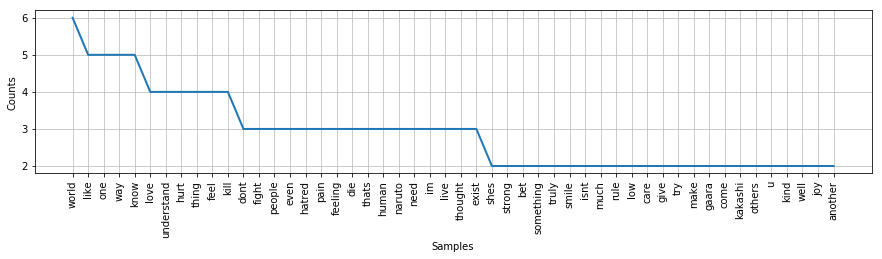

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,3
fdist.plot(50)
plt.show()

In [37]:
final_quotes = []
for i in lemmatized_docs:
    rev = []
    for j in i:
            rev.append(j)
    final_quotes.append(' '.join(rev))

In [38]:
final_quotes

['shes strong and scaryi bet shes singleid put money on it',
 'if you dont like the hand that fate dealt you fight for a new one',
 'when people be protect something truly special to them they truly can becomeas strong a they can be',
 'a smile be the best way to get away with trouble even if it a fake one',
 'when a man learns to love he must bear the risk of hatred',
 'the pain of be alone be completely out of this world isnt it i dont know why but i understand your feeling so much it actually hurt',
 'there no advantage to hurry through life',
 'sure in a ninja world those who violate the rule and fail to follow ordersare low than garbage howeverthose who do not care for and support their fellowsare even low than that',
 'give up try to make me give up',
 'gaara can sasuke come out to die kakashi not nowgaaragaara how bout now',
 'there only one thing that can heal the heart only one it love gaara',
 'the difference between insanity and genius be measure only by success and failure'

In [39]:
data = pd.DataFrame({'Quotes':final_quotes, 'Target':df['Target']})

In [40]:
data.head()

,Quotes,Target
0,shes strong and scaryi bet shes singleid put money on it,1
1,if you dont like the hand that fate dealt you fight for a new one,1
2,when people be protect something truly special to them they truly can becomeas strong a they can be,1
3,a smile be the best way to get away with trouble even if it a fake one,1
4,when a man learns to love he must bear the risk of hatred,1


## Train-Test Split

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.Quotes, data.Target, stratify = data.Target, test_size = 0.3, random_state = 23)

## CountVectorizer

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
X_train.index

Int64Index([11, 27, 4, 3, 19, 1, 22, 8, 20, 9, 2, 25, 18, 15, 16, 10, 6, 28,
            17, 26, 7],
           dtype='int64')

In [44]:
vectorizer = CountVectorizer()
X_lda = vectorizer.fit_transform(X_train)

In [45]:
X_lda.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [46]:
vectorizer.get_feature_names()

['able',
 'about',
 'advantage',
 'afraid',
 'after',
 'alive',
 'alivegaara',
 'all',
 'allow',
 'always',
 'ambiguous',
 'an',
 'and',
 'another',
 'answer',
 'assumption',
 'at',
 'away',
 'awhile',
 'be',
 'bear',
 'because',
 'becomeas',
 'before',
 'besides',
 'best',
 'between',
 'bout',
 'but',
 'by',
 'can',
 'care',
 'catch',
 'change',
 'chase',
 'cling',
 'come',
 'complicate',
 'conclude',
 'conclusion',
 'continue',
 'correct',
 'could',
 'dattebyo',
 'day',
 'dead',
 'dealt',
 'decay',
 'defend',
 'die',
 'difference',
 'disappear',
 'do',
 'dont',
 'dream',
 'else',
 'even',
 'eventually',
 'every',
 'everybody',
 'everyone',
 'exist',
 'existence',
 'experience',
 'face',
 'fail',
 'failure',
 'fake',
 'fate',
 'feel',
 'fellowsare',
 'felt',
 'fight',
 'find',
 'follow',
 'for',
 'forever',
 'form',
 'foughtand',
 'frighten',
 'from',
 'future',
 'gaara',
 'garbage',
 'genius',
 'get',
 'give',
 'hand',
 'hatake',
 'hate',
 'hatred',
 'have',
 'he',
 'heal',
 'heart',

In [246]:
data_lda=pd.DataFrame(X_lda.toarray(),columns=vectorizer.get_feature_names())

In [247]:
data_lda.head()

,able,about,advantage,afraid,after,alive,alivegaara,all,allow,always,...,why,will,wish,with,world,wrong,you,your,yourself,youwanting
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,2,0,0,...,0,0,0,1,0,1,1,0,0,0


## LDA Model for topic Modelling

In [248]:
data_lda.set_index(X_train.index)

,able,about,advantage,afraid,after,alive,alivegaara,all,allow,always,...,why,will,wish,with,world,wrong,you,your,yourself,youwanting
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
19,0,0,0,0,0,0,0,2,0,0,...,0,0,0,1,0,1,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [249]:
from gensim import matutils,models
import scipy.sparse

In [250]:
# One of the required inputs is a term-document matrix
tdm = data_lda.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
able,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
about,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
advantage,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
afraid,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
after,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [251]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [256]:
sparse_counts.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=int64)

In [255]:
corpus

In [252]:
# Gensim also requires dictionary of the all terms and 
#their respective location in the term-document matrix


cv = vectorizer
id2word = dict((v, k) for k, v in cv.vocabulary_.items()) ## we want location:term dictionary

In [253]:
id2word

{200: 'the',
 50: 'difference',
 26: 'between',
 107: 'insanity',
 12: 'and',
 84: 'genius',
 19: 'be',
 138: 'measure',
 156: 'only',
 29: 'by',
 190: 'success',
 66: 'failure',
 7: 'all',
 206: 'thing',
 198: 'that',
 91: 'have',
 77: 'form',
 57: 'eventually',
 47: 'decay',
 229: 'when',
 136: 'man',
 123: 'learns',
 212: 'to',
 132: 'love',
 92: 'he',
 140: 'must',
 20: 'bear',
 171: 'risk',
 154: 'of',
 90: 'hatred',
 183: 'smile',
 25: 'best',
 225: 'way',
 85: 'get',
 17: 'away',
 235: 'with',
 214: 'trouble',
 56: 'even',
 103: 'if',
 110: 'it',
 67: 'fake',
 155: 'one',
 106: 'in',
 157: 'order',
 193: 'survive',
 226: 'we',
 35: 'cling',
 118: 'know',
 217: 'understand',
 120: 'label',
 168: 'reality',
 28: 'but',
 119: 'knowledge',
 10: 'ambiguous',
 42: 'could',
 11: 'an',
 104: 'illusion',
 101: 'human',
 127: 'live',
 237: 'wrong',
 15: 'assumption',
 109: 'isnt',
 13: 'another',
 130: 'look',
 16: 'at',
 180: 'sharingan',
 99: 'how',
 139: 'much',
 30: 'can',
 238: 'you'

In [257]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - 
#the number of topics and the number of passes

lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, 
                      passes=10)
lda.print_topics()

[(0,
  '0.044*"to" + 0.033*"that" + 0.020*"be" + 0.020*"you" + 0.017*"the" + 0.015*"it" + 0.015*"and" + 0.012*"only" + 0.012*"kill" + 0.009*"of"'),
 (1,
  '0.026*"to" + 0.026*"and" + 0.026*"be" + 0.023*"you" + 0.020*"that" + 0.018*"the" + 0.015*"they" + 0.012*"me" + 0.012*"for" + 0.012*"can"')]

In [258]:
# LDA for num_topics = 3
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10)
lda.print_topics()

[(0,
  '0.023*"to" + 0.017*"thing" + 0.017*"like" + 0.017*"for" + 0.017*"it" + 0.016*"the" + 0.016*"my" + 0.016*"up" + 0.016*"give" + 0.010*"dont"'),
 (1,
  '0.041*"to" + 0.032*"you" + 0.029*"that" + 0.027*"be" + 0.027*"and" + 0.020*"the" + 0.015*"they" + 0.013*"can" + 0.013*"it" + 0.013*"only"'),
 (2,
  '0.035*"that" + 0.030*"to" + 0.024*"be" + 0.018*"he" + 0.013*"purpose" + 0.013*"need" + 0.013*"the" + 0.013*"and" + 0.013*"can" + 0.007*"so"')]

In [259]:
# LDA for num_topics = 3
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=5, passes=10)
lda.print_topics()

[(0,
  '0.036*"that" + 0.029*"be" + 0.022*"to" + 0.022*"you" + 0.022*"they" + 0.015*"the" + 0.015*"one" + 0.015*"there" + 0.015*"and" + 0.015*"so"'),
 (1,
  '0.049*"you" + 0.041*"to" + 0.033*"me" + 0.017*"and" + 0.017*"the" + 0.017*"only" + 0.017*"up" + 0.017*"give" + 0.017*"way" + 0.017*"love"'),
 (2,
  '0.033*"to" + 0.025*"the" + 0.025*"it" + 0.025*"be" + 0.025*"and" + 0.025*"that" + 0.017*"of" + 0.017*"with" + 0.017*"all" + 0.017*"way"'),
 (3,
  '0.048*"to" + 0.035*"that" + 0.031*"be" + 0.022*"you" + 0.018*"my" + 0.018*"kill" + 0.018*"for" + 0.014*"and" + 0.014*"it" + 0.014*"they"'),
 (4,
  '0.037*"and" + 0.020*"the" + 0.020*"who" + 0.020*"low" + 0.020*"than" + 0.020*"not" + 0.020*"that" + 0.020*"to" + 0.011*"only" + 0.011*"gaara"')]

## LSA

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df = 0.5, stop_words = 'english', max_features= 1000, smooth_idf=True)

In [48]:
X = vectorizer.fit_transform(X_train)

In [49]:
X.shape # check shape of the document-term matrix

(21, 162)

### Build truncated SVD

In [50]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors
# Since we only have 170 features, take n_components = 100 (should be less than features)

svd_model = TruncatedSVD(n_components=100, algorithm='randomized', n_iter=100, random_state=123)

svd_model.fit(X)

len(svd_model.components_)

21

In [51]:
# This are the weightages of individual terms in per topic / doc:
(svd_model.components_[0])

array([ 5.06017862e-02,  6.59255838e-17,  3.93525760e-02,  3.71619100e-02,
        3.42975483e-02,  3.71619100e-02,  2.42575922e-02,  3.71619100e-02,
        2.42575922e-02,  3.39569932e-02,  6.38804764e-02,  4.42400885e-02,
        6.29975752e-03,  3.39569932e-02,  8.30167440e-02,  6.59101313e-03,
        3.93525760e-02,  7.92202599e-02,  3.93525760e-02,  2.42575922e-02,
        1.05837938e-01,  5.58950078e-02,  3.42975483e-02,  3.71619100e-02,
        3.71619100e-02,  3.93525760e-02,  8.87921907e-17,  5.06017862e-02,
        3.71619100e-02,  9.34914291e-02,  1.22178682e-01,  3.93525760e-02,
        1.07767196e-01, -3.08743789e-17,  3.71619100e-02,  1.71514935e-01,
        1.01263254e-01,  1.22178682e-01,  3.71619100e-02,  1.11485730e-01,
        3.71619100e-02,  3.71619100e-02,  3.93525760e-02,  6.59101313e-03,
       -3.08743789e-17,  3.39569932e-02,  9.34914291e-02,  1.54634565e-01,
        6.59101313e-03,  3.42975483e-02,  1.44280331e-01,  6.59101313e-03,
        3.93525760e-02,  

In [55]:
#The components of svd_model are our topics, and we can access them using svd_model.components_.
#Finally, let’s print a few most important words in each of the 21 topics and see how our model has done.

terms = vectorizer.get_feature_names()

for i, weight in enumerate(svd_model.components_):
    terms_weight = zip(terms, weight)
    #print(i)  i is the topic and svd_model has weight of each term in that topic
    #print(list(terms_comp))
    sorted_terms = sorted(terms_weight, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    y = []
    for t in sorted_terms:
        y.append(t[0])
    print(y)

Topic 0: 
['thing', 'like', 'gaara', 'love', 'dont', 'heal', 'heart']
Topic 1: 
['kill', 'purpose', 'want', 'way', 'complicate', 'just', 'need']
Topic 2: 
['way', 'love', 'smile', 'gaara', 'naruto', 'away', 'best']
Topic 3: 
['way', 'smile', 'like', 'away', 'best', 'fake', 'trouble']
Topic 4: 
['knew', 'foughtand', 'inseparable', 'itthey', 'laughedfriendsand', 'love', 'bear']
Topic 5: 
['low', 'truly', 'awhile', 'lovegaara', 'thought', 'world', 'people']
Topic 6: 
['decay', 'eventually', 'form', 'low', 'thing', 'truly', 'reality']
Topic 7: 
['hurry', 'life', 'advantage', 'nowgaaragaara', 'sasuke', 'bout', 'gaara']
Topic 8: 
['truly', 'protect', 'special', 'strong', 'becomeas', 'people', 'make']
Topic 9: 
['dattebyo', 'truly', 'becomeas', 'protect', 'special', 'strong', 'people']
Topic 10: 
['difference', 'failure', 'genius', 'insanity', 'measure', 'success', 'answer']
Topic 11: 
['make', 'try', 'dattebyo', 'hurry', 'life', 'advantage', 'lovegaara']
Topic 12: 
['lovegaara', 'awhile', 't